# Introducción a Machine Learning y Deep Learning

# Enfoques

## Machine Learning?

![](https://i.imgur.com/wJE1kXr.png)
![](https://i.imgur.com/D9uIbE8.jpg)

## Deep Learning

![](https://imgs.xkcd.com/comics/machine_learning.png)

# Tipos de algoritmos
- Supervised vs unsupervised learning
- Prediction
- Classification
- Inference
- Clustering
- Anomaly detection
- Reinforcement learning

# Comment
Anscombe's quartet. All four sets are identical when examined using simple summary statistics, but vary considerably when graphed:
![](https://i.imgur.com/JyJa13j.png)


# Bias and privacy

[In Stores, Secret Surveillance Tracks Your Every Move](https://www.nytimes.com/interactive/2019/06/14/opinion/bluetooth-wireless-tracking-privacy.html)

[Under digital surveillance: how American schools spy on millions of kids](https://www.theguardian.com/world/2019/oct/22/school-student-surveillance-bark-gaggle)

[Facebook and Google’s pervasive surveillance poses an unprecedented danger to human rights](https://www.amnesty.org/en/latest/news/2019/11/google-facebook-surveillance-privacy/)

[For some employment algorithms, disability discrimination by default](https://www.brookings.edu/blog/techtank/2019/10/31/for-some-employment-algorithms-disability-discrimination-by-default/)

[Massive Hack Strikes Offshore Cayman National Bank and Trust](https://unicornriot.ninja/2019/massive-hack-strikes-offshore-cayman-national-bank-and-trust/)


[Personal and Social information of 1.2 billion people Discovered in Massive Data Leak](https://www.dataviper.io/blog/2019/pdl-data-exposure-billion-people/)

[Google says the built-in microphone it never told Nest users about was 'never supposed to be a secret](https://www.businessinsider.com/nest-microphone-was-never-supposed-to-be-a-secret-2019-2)

[Facebook stored millions of Instagram passwords in plain text](https://www.theverge.com/2019/4/18/18485599/facebook-instagram-passwords-plain-text-millions-users)

[Google collects Android users’ locations even when location services are disabled](https://qz.com/1131515/google-collects-android-users-locations-even-when-location-services-are-disabled/?utm_source=reddit.com)

[China bans 23m from buying travel tickets as part of 'social credit' system](https://www.theguardian.com/world/2019/mar/01/china-bans-23m-discredited-citizens-from-buying-travel-tickets-social-credit-system)

[White House Publishes Names, Emails, Phone Numbers, Home Addresses of Critics](http://www.slate.com/blogs/the_slatest/2017/07/15/white_house_publishes_names_emails_phone_numbers_home_addresses_of_critics.html)

# MNIST_database

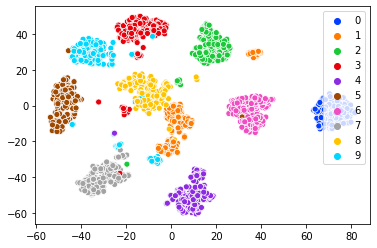

In [0]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns

digits, y = load_digits(return_X_y=True)
tsne = TSNE(n_components=2, random_state=0)
x_2d = tsne.fit_transform(digits.data)

palette = sns.color_palette("bright", 10)

sns.scatterplot(x_2d[:,0], x_2d[:,1], hue=y, legend='full', palette=palette)

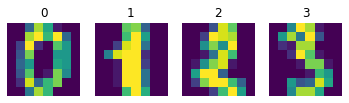

In [0]:
digits = load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(4, 4, index + 5)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Prediction: %i' % prediction)
    plt.tight_layout()

plt.show()

In [0]:
from sklearn import svm

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

half_samples = n_samples // 2
classifier = svm.SVC(gamma=0.1)
classifier.fit(data[:half_samples], digits.target[:half_samples])

expected = digits.target[half_samples:]
predicted = classifier.predict(data[half_samples:])

images_and_predictions = list(zip(digits.images[half_samples:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(4, 4, index + 5)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Prediction: %i' % prediction)
    plt.tight_layout()

plt.show()

NameError: ignored

In [0]:
from sklearn import metrics
print("%s\n" % (metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        86
           3       0.10      1.00      0.18        91
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        91
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        92

    accuracy                           0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899


Confusion matrix:
[[ 0  0  0 88  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0 86  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0 92  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Titanic

In [0]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from IPython.display import display

data = pd.read_csv('https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/train.csv')
display(data.head())

data = data.drop(['PassengerId', 'Name', 'Embarked', 'Cabin', 'Ticket', 'Age'], axis=1)
data['Fare'] = data['Fare'].fillna(0)
data['Fare'] = data['Fare'].astype(int)
data['Sex'] = data['Sex'].map({"male": 0, "female": 1})

n_passengers = len(data)

n_train_rows = int(n_passengers * 0.9)
n_test_rows = int(n_passengers * 0.1)

X_train = data[:n_train_rows]
Y_train = X_train["Survived"]

X_test = data[n_test_rows:]
Y_test = X_test["Survived"]

X_train = X_train.drop("Survived", axis=1)
X_test = X_test.drop("Survived", axis=1)

X_train = X_train.drop(['Sex', 'Fare', 'Pclass'], axis=1)
X_test = X_test.drop(['Sex', 'Fare', 'Pclass'], axis=1)

display(X_train.head())

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

SibSp  Parch
0      1      0
1      1      0
2      0      0
3      1      0
4      0      0

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)
print(random_forest.score(X_train, Y_train))

0.6629213483146067


In [0]:
row_number = 0

display(X_test.iloc[row_number])
print("Prediction: " + str(Y_prediction[row_number]))
print("Value: " + str(Y_test.iloc[row_number]))

SibSp    0
Parch    0
Name: 89, dtype: int64

Prediction: 0
Value: 0


# AutoML

In [0]:
!pip3 install tpot
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTClassifier(generations=10, population_size=10, cv=5, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

Generation 1 - Current best internal CV score: 0.9547096603193832
Generation 2 - Current best internal CV score: 0.9547096603193832
Generation 3 - Current best internal CV score: 0.9605738240834221
Generation 4 - Current best internal CV score: 0.961383148574669
Generation 5 - Current best internal CV score: 0.961383148574669
Generation 6 - Current best internal CV score: 0.9643546801796233
Generation 7 - Current best internal CV score: 0.9643546801796233
Generation 8 - Current best internal CV score: 0.9643546801796233
Generation 9 - Current best internal CV score: 0.9658500125067517
Generation 10 - Current best internal CV score: 0.971044252364622

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=23, p=2, weights=distance)
0.96


In [0]:
!cat tpot_exported_pipeline.py

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import OneHotEncoder

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.940651405287479
exported_pipeline = make_pipeline(
    OneHotEncoder(minimum_fraction=0.25, sparse=False, threshold=10),
    SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.0, learning_rate="constant", loss="perceptron", penalty="elasticnet", power_t=0.1)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predi

In [0]:



import tpot
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import OneHotEncoder

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

exported_pipeline = make_pipeline(
    OneHotEncoder(minimum_fraction=0.25, sparse=False, threshold=10),
    SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.0, learning_rate="constant", loss="perceptron", penalty="elasticnet", power_t=0.100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(exported_pipeline.score(X_test, y_test))

0.9244444444444444


## Neural Network resources
- [Colah's blog](https://colah.github.io/)
- [Fast AI Deep Learning 2019](https://course.fast.ai/videos/?lesson=1)
- [3blue1brown Neural Networks](https://www.3blue1brown.com/neural-networks)
